<a href="https://colab.research.google.com/github/Sr74/TrabajoFinal/blob/master/AD_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE DATA SIS ATENCIONES 2020


### Importando librerias 


In [55]:
#Primero importamos las librerias a usar
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

### Cargando la data

In [56]:
#Cargamos la data 
path = '/content/drive/MyDrive/SIS_Data/OPENDATA_DS_01_2020_ATENCIONES.csv'
df = pd.read_csv(path, encoding = 'ISO-8859-1', delimiter='|')
df.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AÑO,MES,REGION,PROVINCIA,UBIGEO_DISTRITO,DISTRITO,COD_UNIDAD_EJECUTORA,DESC_UNIDAD_EJECUTORA,COD_IPRESS,IPRESS,NIVEL_EESS,PLAN_DE_SEGURO,COD_SERVICIO,DESC_SERVICIO,SEXO,GRUPO_EDAD,ATENCIONES
0,2020,9,LA LIBERTAD,PATAZ,130808,PARCOY,845.0,REGION LA LIBERTAD - SALUD,0000005387,VAQUERIA DE ANDAS,I,SIS GRATUITO,62.0,ATENCIÓN POR EMERGENCIA,FEMENINO,18 - 29 AÑOS,1.0
1,2020,9,LA LIBERTAD,PATAZ,130808,PARCOY,845.0,REGION LA LIBERTAD - SALUD,0000005387,VAQUERIA DE ANDAS,I,SIS PARA TODOS,9.0,ATENCIÓN PRENATAL,FEMENINO,30 - 59 AÑOS,1.0
2,2020,9,LA LIBERTAD,PATAZ,130808,PARCOY,845.0,REGION LA LIBERTAD - SALUD,0000016974,UCHUCUAYO,I,SIS GRATUITO,9.0,ATENCIÓN PRENATAL,FEMENINO,30 - 59 AÑOS,1.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Valores faltantes


In [57]:
#Verificando si existen valores faltantes
missing_data = df.isnull()
#Resultados en una lista
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

AÑO
False    207881
Name: AÑO, dtype: int64

MES
False    207881
Name: MES, dtype: int64

REGION
False    207881
Name: REGION, dtype: int64

PROVINCIA
False    207782
True         99
Name: PROVINCIA, dtype: int64

UBIGEO_DISTRITO
False    207880
True          1
Name: UBIGEO_DISTRITO, dtype: int64

DISTRITO
False    207781
True        100
Name: DISTRITO, dtype: int64

COD_UNIDAD_EJECUTORA
False    207880
True          1
Name: COD_UNIDAD_EJECUTORA, dtype: int64

DESC_UNIDAD_EJECUTORA
False    207880
True          1
Name: DESC_UNIDAD_EJECUTORA, dtype: int64

COD_IPRESS
False    207880
True          1
Name: COD_IPRESS, dtype: int64

IPRESS
False    207880
True          1
Name: IPRESS, dtype: int64

NIVEL_EESS
False    207880
True          1
Name: NIVEL_EESS, dtype: int64

PLAN_DE_SEGURO
False    207880
True          1
Name: PLAN_DE_SEGURO, dtype: int64

COD_SERVICIO
False    207880
True          1
Name: COD_SERVICIO, dtype: int64

DESC_SERVICIO
False    207880
True          1
Name: DESC_SE

### Análisis del resultado

Columnas con datos faltantes:

>PROVINCIA
<br> Cantidad Datos Faltantes: <b>2709</b>

>DISTRITO
<br> Cantidad Datos Faltantes: <b>2709</b>

### Revisando las columnas


---



---




In [58]:
#Verificando si existen columna inservibles
df.columns

Index(['AÑO', 'MES', 'REGION', 'PROVINCIA', 'UBIGEO_DISTRITO', 'DISTRITO',
       'COD_UNIDAD_EJECUTORA', 'DESC_UNIDAD_EJECUTORA', 'COD_IPRESS', 'IPRESS',
       'NIVEL_EESS', 'PLAN_DE_SEGURO', 'COD_SERVICIO', 'DESC_SERVICIO', 'SEXO',
       'GRUPO_EDAD', 'ATENCIONES'],
      dtype='object')

### Análisis del resultado

>Al analizar cada columna y sus valores de acuerdo con el diccionario de datos, llegamos a la conclusión que hay columnas que no nos van a servir para analizar la data, en este caso son:
<br> <b>'UBIGEO_DISTRITO'</b>, ya que podemos trabajar directamente con la columna <b>'DISTRITO'</b>
<br> <b>'COD_UNIDAD_EJECUTORA'</b>, ya que podemos trabajar directamente con la columna <b>'DESC_UNIDAD_EJECUTORA'</b>
<br> <b>'COD_IPRESS'</b>, ya que podemos trabajar directamente con la columna <b>'IPRESS'</b>
<br> <b>'COD_SERVICIO'</b>, ya que podemos trabajar directamente con la columna <b>'DESC_SERVICIO'</b>

### Haciendo frente a los datos faltantes e inservibles

#### <i>Primero: Visualizamos los datos faltantes e inservibles</i>

<b>Datos faltantes</b>
<br>Para las filas de las columnas <b>PROVINCIA y DISTRITO</b>

In [59]:
#Estamos pidiendo que se seleccione aquellas filas que tienen un valor de NaN en la columna provincia
table_MD1 = df[pd.isnull(df['PROVINCIA'])]
table_MD1.head(2)

,AÑO,MES,REGION,PROVINCIA,UBIGEO_DISTRITO,DISTRITO,COD_UNIDAD_EJECUTORA,DESC_UNIDAD_EJECUTORA,COD_IPRESS,IPRESS,NIVEL_EESS,PLAN_DE_SEGURO,COD_SERVICIO,DESC_SERVICIO,SEXO,GRUPO_EDAD,ATENCIONES
14956,2020,9,PUNO,NaN,,NaN,915.0,REGION PUNO - SALUD MELGAR,A021002,MELGAR,I,SIS GRATUITO,15.0,DIAGNÓSTICO DEL EMBARAZO,FEMENINO,30 - 59 AÑOS,3.0
14957,2020,9,PUNO,NaN,,NaN,915.0,REGION PUNO - SALUD MELGAR,A021002,MELGAR,I,SIS GRATUITO,17.0,ATENCIÓN INTEGRAL DEL ADOLESCENTE,MASCULINO,12 - 17 AÑOS,2.0


<b>Datos inservibles</b>
<br>Contamos la cantidad de columnas 

In [ ]:
len(df.columns)

17

#### <i>Segundo: Eliminamos los datos faltantes e inservibles</i>

De acuerdo a lo analizado, se decide eliminar las filas faltantes ya que al no tener un distrito y provincia dado no podremos analizar la data, e igualmente pasa lo mismo con las unidades ejecutoras

In [60]:
#Eliminar las filas complets que tienen valor NaN en la columna analizada
df.dropna(subset=['PROVINCIA'], axis=0, inplace=True)
#Reestablecer los indices, ya que se elimnaron filas
df.reset_index(drop=True, inplace=True)

In [61]:
#Eliminar columnas, las cuales tienen valores inservibles 
df.drop(columns = ['UBIGEO_DISTRITO', 'COD_UNIDAD_EJECUTORA', 'COD_IPRESS', 'COD_SERVICIO'], inplace = True)
#Reestablecer los indices, ya que se elimnaron columnas
df.reset_index(drop=True, inplace=True)

#### <i>Tercero: Verificamos la eliminación de los datos faltantes e inservibles</i>

In [62]:
#Verificando si existen valores faltantes
missing_data = df.isnull()
#Resultados en una lista
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

AÑO
False    207782
Name: AÑO, dtype: int64

MES
False    207782
Name: MES, dtype: int64

REGION
False    207782
Name: REGION, dtype: int64

PROVINCIA
False    207782
Name: PROVINCIA, dtype: int64

DISTRITO
False    207781
True          1
Name: DISTRITO, dtype: int64

DESC_UNIDAD_EJECUTORA
False    207781
True          1
Name: DESC_UNIDAD_EJECUTORA, dtype: int64

IPRESS
False    207781
True          1
Name: IPRESS, dtype: int64

NIVEL_EESS
False    207781
True          1
Name: NIVEL_EESS, dtype: int64

PLAN_DE_SEGURO
False    207781
True          1
Name: PLAN_DE_SEGURO, dtype: int64

DESC_SERVICIO
False    207781
True          1
Name: DESC_SERVICIO, dtype: int64

SEXO
False    207781
True          1
Name: SEXO, dtype: int64

GRUPO_EDAD
False    207781
True          1
Name: GRUPO_EDAD, dtype: int64

ATENCIONES
False    207781
True          1
Name: ATENCIONES, dtype: int64



In [12]:
#Verificando la nueva cantidad de columnas
len(df.columns)

13

### Formateo de datos


In [64]:
#Visualizando el tipo de dato de las columnas
df.dtypes

AÑO                        int64
MES                        int64
REGION                    object
PROVINCIA                 object
DISTRITO                  object
DESC_UNIDAD_EJECUTORA     object
IPRESS                    object
NIVEL_EESS                object
PLAN_DE_SEGURO            object
DESC_SERVICIO             object
SEXO                      object
GRUPO_EDAD                object
ATENCIONES               float64
dtype: object

>Se llega a la conclusión que la columna "ATENCIONES" tienen el tipo de dato incorrecto, debería ser un Entero

In [65]:
#En caso de existir columnas con el tipo de dato erróneo, se utiliza el siguiente código:
##Corregir el tipo de dato de la columna 'nombreCol'
df[['ATENCIONES']] = df[['ATENCIONES']].astype(int)

ValueError: ignored

In [ ]:
#Verificando el cambio
#df.dtypes

### <i>Tenemos el conjunto de datos limpio sin valores faltantes con todos los datos en su formato adecuado :)</i>

## Gráficos

In [ ]:
#Importar libreria para el histograma
import pip
import matplotlib as plt
from matplotlib import pyplot
from pandas import DataFrame

In [ ]:
#instalar Seaborn usamos pip
import pip
#importar paquetes de visualizacion
import seaborn as sns

### Analizando por Mes

In [66]:
#Suma total de las atenciones realizadas en el año dado
df.ATENCIONES.sum()

1402250.0

In [67]:
#Suma de las atenciones realizadas por cada mes
df_M_A = pd.DataFrame(df.groupby(["MES"])["ATENCIONES"].sum())
df_M_A.reset_index()

,MES,ATENCIONES
0,1,160003.0
1,9,175420.0
2,10,412926.0
3,11,400563.0
4,12,253338.0


Text(0.5, 1.0, 'Total de Atenciones por Mes')

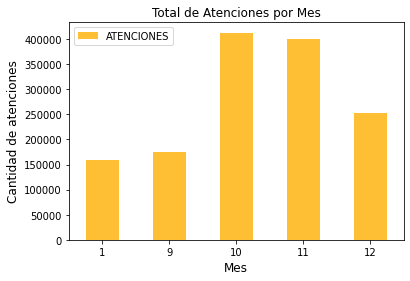

In [68]:
#Gráfico de la suma de las atenciones realizadas por cada mes
df_M_A.plot(kind='bar',color="#FFBF35")
plt.pyplot.xlabel("Mes",fontsize = 12)
plt.pyplot.xticks(rotation = "horizontal")
plt.pyplot.ylabel("Cantidad de atenciones",fontsize = 12)
plt.pyplot.title("Total de Atenciones por Mes")

#### Agrupando en trimestres

In [ ]:
#Vista general de todos los meses:
#plt.pyplot.hist(df["MES"])
#plt.pyplot.xlabel("Mes")
#plt.pyplot.ylabel("Count")
#plt.pyplot.title("Mes bins",fontsize = 15)

##### Binning

In [ ]:
#Creamos el array 
bins = np.linspace(min(df["MES"]), max(df["MES"]), 5)
#Definimos los nombres de los grupos
group_names = ['1er Trimestre', '2do Trimestre', '3er Trimestre', '4to Trimestre']
#Clasificamos cada fila en el grupo que le corresponde
df['MES-binned'] = pd.cut(df['MES'], bins, labels=group_names, include_lowest=True )

In [ ]:
#Suma de las atenciones realizadas por cada trimestre
df.groupby(["MES-binned"])["ATENCIONES"].sum()

In [ ]:
#Gráfico de la suma de las atenciones realizadas por cada trimestre
##Definiendo ejes
eje_x = group_names
eje_y = df.groupby(["MES-binned"])["ATENCIONES"].sum()
##Trazar el diagrama de barras 
pyplot.bar(eje_x, eje_y, color="#00AD85")
##Definir parametros
plt.pyplot.xlabel("Trimestres",fontsize = 12)
plt.pyplot.ylabel("Cantidad de atenciones",fontsize = 12)
plt.pyplot.title("Total de Atenciones por Trimestre",font="Times New Roman",fontsize = 18)

### Analizando por NIVEL_EESS	

NIVEL_I : Centros y Puestos de salud
NIVEL_II : Hospitales
NIVEL_III : Insitutos especializados

Al analizar los datos de la columna Nivel de Establecimiento de Salud (NIVEL_EESS), llegamos a la conclusión que existen valores que no deberían estar en la data y que estropean el análisis que se desea hacer; por lo tanto se eliminarán.
Los valores que toma la columna NIVEL_EESS son: 0, I, II, III, de los cuales el valor 0 es un fallo de la data.

In [69]:
#Obtencion de los indices que tiene el valor 0 en la columna dada
condicion = df[df['NIVEL_EESS']=="0"].index
#Eliminación de filas con la condicion dada
df.drop(condicion , inplace=True)

In [70]:
#Verificación de la eliminación de las filas con el valor 0 en la columna NIVEL_EESS
df[df['NIVEL_EESS']=="0"]

,AÑO,MES,REGION,PROVINCIA,DISTRITO,DESC_UNIDAD_EJECUTORA,IPRESS,NIVEL_EESS,PLAN_DE_SEGURO,DESC_SERVICIO,SEXO,GRUPO_EDAD,ATENCIONES


Luego de corregir la data, seguimos con el análisis:

In [71]:
#Suma de las atenciones realizadas por cada NIVEL_EES
df_N_A = pd.DataFrame(df.groupby(['NIVEL_EESS'])["ATENCIONES"].sum())
df_N_A.reset_index()

,NIVEL_EESS,ATENCIONES
0,I,1225865.0
1,II,110126.0
2,III,64403.0


Text(0.5, 1.0, 'Total de Atenciones por NIVEL_EESS')

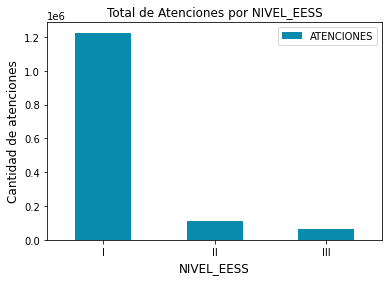

In [72]:
#Gráfico de la suma de las atenciones realizadas por cada NIVEL_EES
df_N_A.plot(kind='bar',color="#098BAB")
plt.pyplot.xlabel("NIVEL_EESS",fontsize = 12)
plt.pyplot.xticks(rotation='horizontal') 
plt.pyplot.ylabel("Cantidad de atenciones",fontsize = 12)
plt.pyplot.title("Total de Atenciones por NIVEL_EESS")

### Analizando por PLAN_DE_SEGURO

In [73]:
#Suma de las atenciones realizadas por cada PLAN_DE_SEGURO
df_P_A = pd.DataFrame(df.groupby(['PLAN_DE_SEGURO'])["ATENCIONES"].sum())
df_P_A.reset_index()

,PLAN_DE_SEGURO,ATENCIONES
0,SIS GRATUITO,1344500.0
1,SIS INDEPENDIENTE,5928.0
2,SIS MYPES,94.0
3,SIS NRUS,3178.0
4,SIS PARA TODOS,46694.0


Text(0.5, 1.0, 'Total de Atenciones por PLAN_DE_SEGURO')

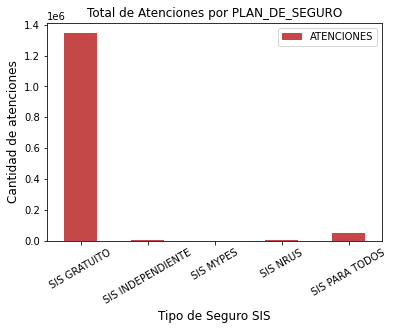

In [74]:
#Gráfico de la suma de las atenciones realizadas por cada PLAN_DE_SEGURO
df_P_A.plot(kind='bar',color="#C44848")
plt.pyplot.xlabel("Tipo de Seguro SIS",fontsize = 12)
plt.pyplot.xticks(rotation = 30)
plt.pyplot.ylabel("Cantidad de atenciones",fontsize = 12)
plt.pyplot.title("Total de Atenciones por PLAN_DE_SEGURO")

### Analizando por SEXO

In [75]:
#Suma de las atenciones realizadas por cada tipo de SEXO
df_S_A = pd.DataFrame(df.groupby(['SEXO'])["ATENCIONES"].sum())
df_S_A.reset_index()

,SEXO,ATENCIONES
0,FEMENINO,915360.0
1,MASCULINO,485034.0


Text(0.5, 1.0, 'Total de Atenciones por SEXO')

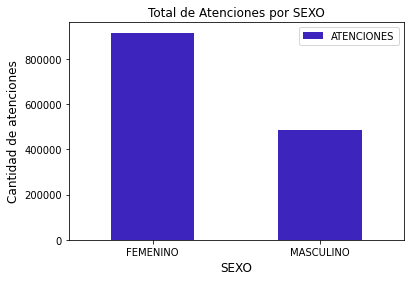

In [76]:
#Gráfico de la suma de las atenciones realizadas por cada tipo de sexo
df_S_A.plot(kind='bar',color="#3C24BD")
plt.pyplot.xlabel("SEXO",fontsize = 12)
plt.pyplot.xticks(rotation='horizontal') 
plt.pyplot.ylabel("Cantidad de atenciones",fontsize = 12)
plt.pyplot.title("Total de Atenciones por SEXO")

### Analizando por GRUPO_EDAD

Verificamos el grupo de datos

In [42]:
pd.unique(df['GRUPO_EDAD'])

array(['00 - 04 AÑOS', '12 - 17 AÑOS', '60 - MAS AÑOS', '18 - 29 AÑOS',
       '05 - 11 AÑOS', '30 - 59 AÑOS', '05 '], dtype=object)

Si encontramos algún error como en la imagen de abajo, el cual considera otro tipo de dato solo por que la palabra 'años' está escrito en minúscula, entonces utilizamos el código siguiente para poner todos los valores a mayúscula y así corregir la data.
<br> df['GRUPO_EDAD'] = df['GRUPO_EDAD'].str.upper()

![Datos%20de%20GRUPO_EDAD.png](attachment:Datos%20de%20GRUPO_EDAD.png)

In [77]:
#Suma de las atenciones realizadas por cada grupo de edad
df_E_A = pd.DataFrame(df.groupby(['GRUPO_EDAD'])["ATENCIONES"].sum())
df_E_A.reset_index()

,GRUPO_EDAD,ATENCIONES
0,00 - 04 AÑOS,445895.0
1,05 - 11 AÑOS,116548.0
2,12 - 17 AÑOS,105573.0
3,18 - 29 AÑOS,254773.0
4,30 - 59 AÑOS,341508.0
5,60 - MAS AÑOS,136097.0


Text(0.5, 1.0, 'Total de Atenciones por grupo de edad')

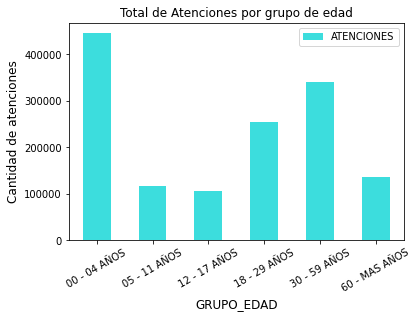

In [78]:
#Gráfico de la suma de las atenciones realizadas por cada grupo de edad
df_E_A.plot(kind='bar',color="#3CDDDD")
plt.pyplot.xlabel("GRUPO_EDAD",fontsize = 12)
plt.pyplot.xticks(rotation=30) 
plt.pyplot.ylabel("Cantidad de atenciones",fontsize = 12)
plt.pyplot.title("Total de Atenciones por grupo de edad")

### Analizando por REGION

In [89]:
#Suma de las atenciones realizadas por cada region
df_R_A = pd.DataFrame(df.groupby(['REGION'])["ATENCIONES"].sum())
fa = df_R_A.reset_index().sort_values("ATENCIONES",ascending=False)


,REGION,ATENCIONES
13,LIMA METROPOLITANA,178984.0
0,AMAZONAS,178060.0
4,CAJAMARCA,93721.0
6,CUSCO,73351.0
19,PIURA,71444.0
25,ÁNCASH,71430.0
11,LA LIBERTAD,68955.0
15,LORETO,65211.0
20,PUNO,60868.0
21,SAN MARTÍN,58631.0


Text(0.5, 1.0, 'Total de Atenciones por Region')

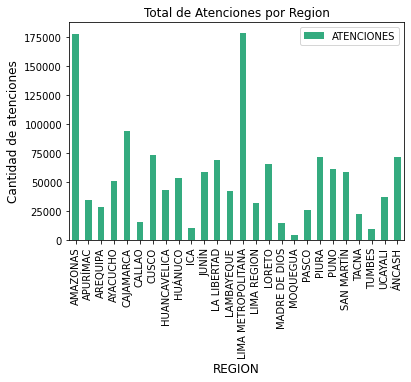

In [91]:
#Gráfico de la suma de las atenciones realizadas por cada Region
df_R_A.plot(kind='bar',color="#34AB7F")
plt.pyplot.xlabel("REGION",fontsize = 12)
plt.pyplot.ylabel("Cantidad de atenciones",fontsize = 12)
plt.pyplot.title("Total de Atenciones por Region")

### Ahora analizaremos entre varias columnas

#### Analizando la cantidad de Atenciones por cada Mes agrupados por Sexo

In [92]:
#Suma de atenciones por cada mes agrupadas por tipo de sexo
df_SM = pd.DataFrame(df.groupby(["MES","SEXO"], as_index=False)["ATENCIONES"].sum())
df_SM.reset_index()
df_SM

,MES,SEXO,ATENCIONES
0,1,FEMENINO,101335.0
1,1,MASCULINO,58668.0
2,9,FEMENINO,113803.0
3,9,MASCULINO,61342.0
4,10,FEMENINO,272516.0
5,10,MASCULINO,140044.0
6,11,FEMENINO,262693.0
7,11,MASCULINO,136790.0
8,12,FEMENINO,165013.0
9,12,MASCULINO,88190.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


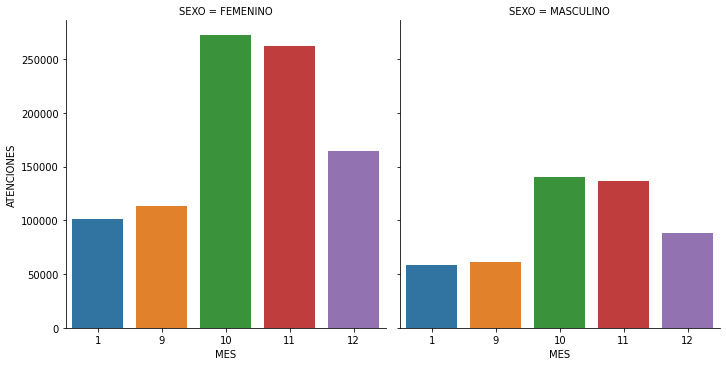

In [93]:
#Gráfica de atenciones por cada mes agrupadas por tipo de sexo
sns.catplot("MES", "ATENCIONES", col="SEXO", data=df_SM, kind="bar")

#### Analizando la Cantidad de Atenciones por Tipo de servicios agrupados por Edad

In [99]:
#Nombre de la máxima atencion de desc_servicio por grupo de edad
List_A_T_E = df.groupby(['GRUPO_EDAD','DESC_SERVICIO'])['ATENCIONES'].sum()
List_A_T_E.groupby(['GRUPO_EDAD']).idxmax(axis=0).tolist()

[('00 - 04 AÑOS',
  'CONTROL DE CRECIMIENTO Y DESARROLLO EN MENORES DE 0 - 4 AÑOS'),
 ('05 - 11 AÑOS', 'CONSULTA EXTERNA'),
 ('12 - 17 AÑOS', 'CONSULTA EXTERNA'),
 ('18 - 29 AÑOS', 'CONSULTA EXTERNA'),
 ('30 - 59 AÑOS', 'CONSULTA EXTERNA'),
 ('60 - MAS AÑOS', 'CONSULTA EXTERNA')]

In [100]:
#Suma las atenciones por desc_servicio agrupados por edad
df_TE = pd.DataFrame(df.groupby(['GRUPO_EDAD','DESC_SERVICIO'])['ATENCIONES'].sum()).reset_index()
#Valor máximo de cada desc_servicio en cada grupo de edad
df_TE.groupby(['GRUPO_EDAD'])['ATENCIONES'].max()

GRUPO_EDAD
00 - 04 AÑOS      99839.0
05 - 11 AÑOS      32875.0
12 - 17 AÑOS      23179.0
18 - 29 AÑOS      51913.0
30 - 59 AÑOS     121465.0
60 - MAS AÑOS     74290.0
Name: ATENCIONES, dtype: float64

Text(0.5, 1.0, 'Total de Atenciones de un tipo de servicio por GRUPO_EDAD')

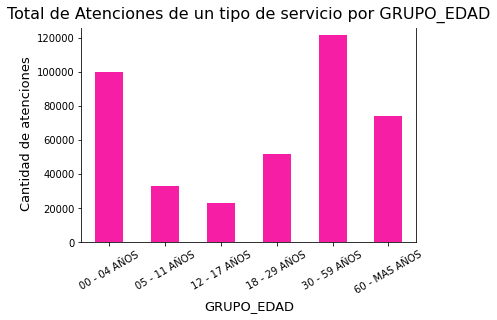

In [101]:
#Grafica x=grupo de edad, y=cant atenciones y las barras es la máxima atencion del grupo de edad
df_TE.groupby(['GRUPO_EDAD'])['ATENCIONES'].max().plot(kind='bar', color="#F51EA5")
plt.pyplot.xlabel("GRUPO_EDAD",fontsize = 13)
plt.pyplot.xticks(rotation = 30)
plt.pyplot.ylabel("Cantidad de atenciones",fontsize = 13)
plt.pyplot.title("Total de Atenciones de un tipo de servicio por GRUPO_EDAD",fontsize = 16,backgroundcolor='white')

In [102]:
g_D_GE = sns.catplot(x="GRUPO_EDAD", y="ATENCIONES", hue="GRUPO_EDAD", col = "DESC_SERVICIO", data=AxSyE2, kind="bar")
g_D_GE.set_xticklabels(rotation=30)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing

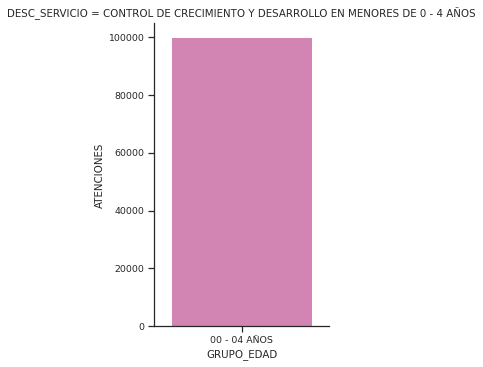

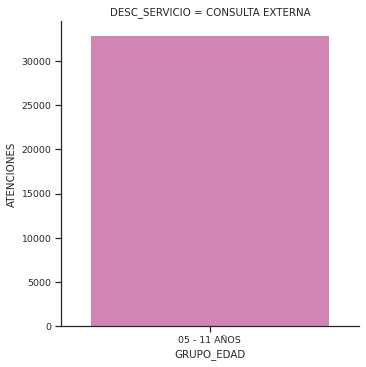

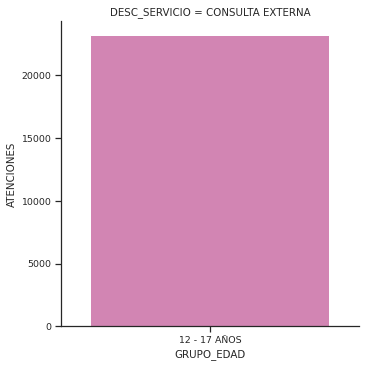

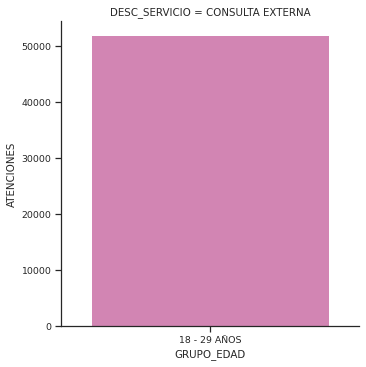

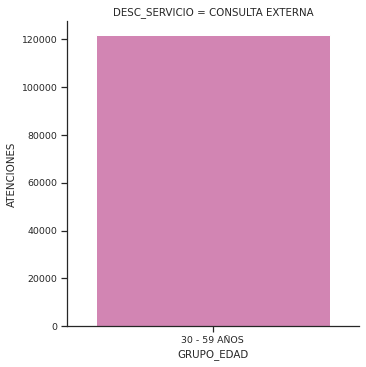

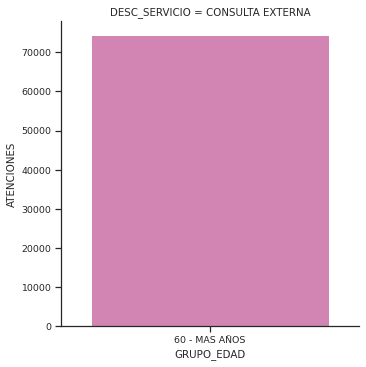

In [103]:
#Creando un nuevo dataframe para almacenar la data
AxSyE = pd.DataFrame(df.groupby(['GRUPO_EDAD','DESC_SERVICIO'])['ATENCIONES'].sum()).reset_index()

ge = AxSyE.groupby('GRUPO_EDAD')

g1 = ge.get_group("00 - 04 AÑOS").sort_values("ATENCIONES",ascending=False)
g2 = ge.get_group("05 - 11 AÑOS").sort_values("ATENCIONES",ascending=False)
g3 = ge.get_group("12 - 17 AÑOS").sort_values("ATENCIONES",ascending=False)
g4 = ge.get_group("18 - 29 AÑOS").sort_values("ATENCIONES",ascending=False)
g5 = ge.get_group("30 - 59 AÑOS").sort_values("ATENCIONES",ascending=False)
g6 = ge.get_group("60 - MAS AÑOS").sort_values("ATENCIONES",ascending=False)

#Graficando
sns.set(style='ticks', font = "Arial", font_scale=0.85)
sns.catplot("GRUPO_EDAD", "ATENCIONES", col="DESC_SERVICIO", data=g1.head(1), kind="bar",color='#DF78B6')
sns.catplot("GRUPO_EDAD", "ATENCIONES", col="DESC_SERVICIO", data=g2.head(1), kind="bar",color='#DF78B6')
sns.catplot("GRUPO_EDAD", "ATENCIONES", col="DESC_SERVICIO", data=g3.head(1), kind="bar",color='#DF78B6')
sns.catplot("GRUPO_EDAD", "ATENCIONES", col="DESC_SERVICIO", data=g4.head(1), kind="bar",color='#DF78B6')
sns.catplot("GRUPO_EDAD", "ATENCIONES", col="DESC_SERVICIO", data=g5.head(1), kind="bar",color='#DF78B6')
sns.catplot("GRUPO_EDAD", "ATENCIONES", col="DESC_SERVICIO", data=g6.head(1), kind="bar",color='#DF78B6')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


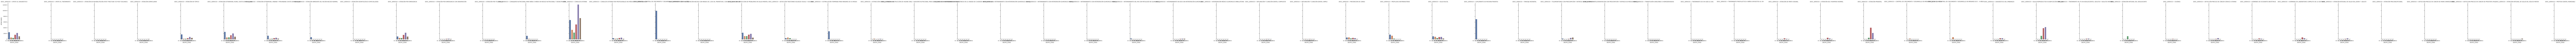

In [104]:
#GENERAL: Graficando las ATENCIONES POR DESC_SERVICIO EN GRUPO_EDAD
sns.catplot("GRUPO_EDAD", "ATENCIONES", col="DESC_SERVICIO", data=AxSyE, kind="bar")

#### Analizando la cantidad de Atenciones por cada Tipo de SIS agrupados por Edad

In [105]:
#Suma de atenciones por cada tipo PLAN_DE_SEGURO agrupadas por GRUPO_EDAD
df_PGE = pd.DataFrame(df.groupby(["PLAN_DE_SEGURO","GRUPO_EDAD"], as_index=False)["ATENCIONES"].sum())
df_PGE.reset_index()
df_PGE

,PLAN_DE_SEGURO,GRUPO_EDAD,ATENCIONES
0,SIS GRATUITO,00 - 04 AÑOS,445809.0
1,SIS GRATUITO,05 - 11 AÑOS,112500.0
2,SIS GRATUITO,12 - 17 AÑOS,100652.0
3,SIS GRATUITO,18 - 29 AÑOS,237544.0
4,SIS GRATUITO,30 - 59 AÑOS,318867.0
5,SIS GRATUITO,60 - MAS AÑOS,129128.0
6,SIS INDEPENDIENTE,05 - 11 AÑOS,141.0
7,SIS INDEPENDIENTE,12 - 17 AÑOS,120.0
8,SIS INDEPENDIENTE,18 - 29 AÑOS,627.0
9,SIS INDEPENDIENTE,30 - 59 AÑOS,2998.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


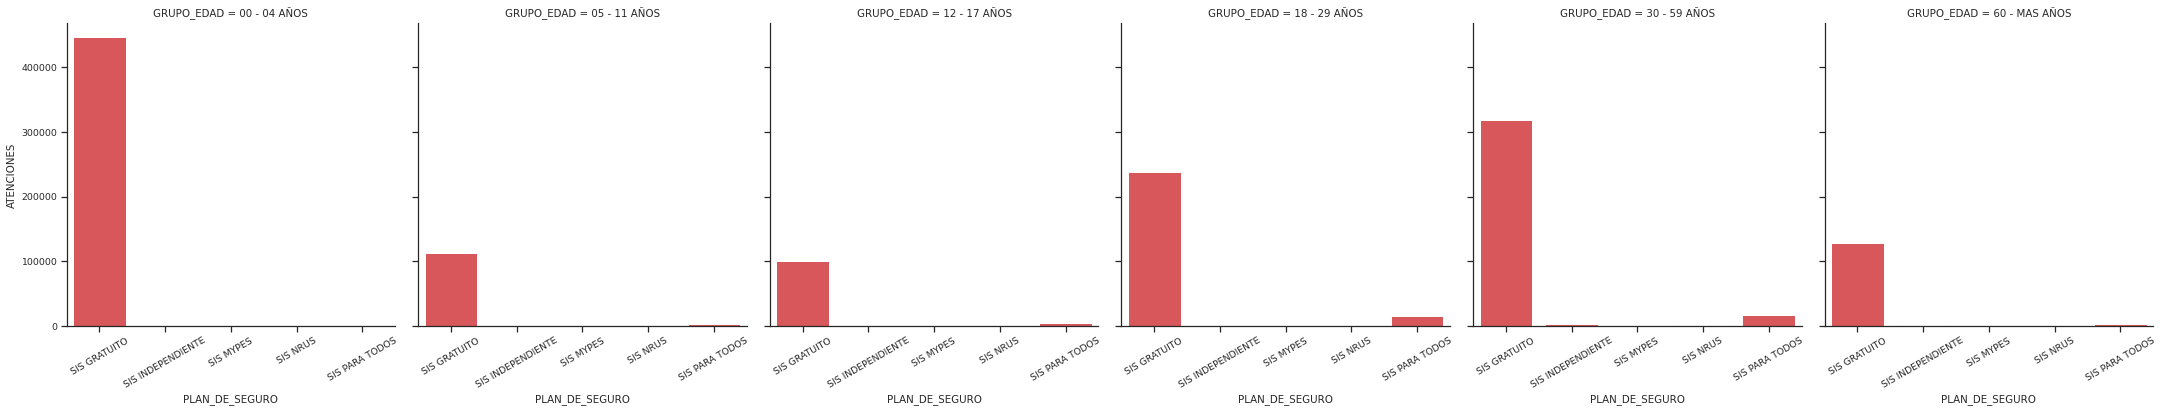

In [106]:
#Gráfica de atenciones por grupo de edad y plan de seguro
g_P_GE = sns.catplot("PLAN_DE_SEGURO", "ATENCIONES", col="GRUPO_EDAD", data=df_PGE, kind="bar", color="#EC4247")
g_P_GE.set_xticklabels(rotation=30)

#### Analizando la Cantidad de Atenciones por Mes agrupados por Tipo de servicios 

In [111]:
#Suma de atenciones por cada mes agrupadas por tipo de servicio
df_DSM = pd.DataFrame(df.groupby(["MES","DESC_SERVICIO"], as_index=False)["ATENCIONES"].sum())
df_DSM.reset_index().sort_values("ATENCIONES",ascending=False)
df_DSM

,MES,DESC_SERVICIO,ATENCIONES
0,1,APOYO AL DIAGNÓSTICO,5242.0
1,1,ATENCIÓN DE PARTO VAGINAL,381.0
2,1,ATENCIÓN DE REHABILITACIÓN (POST FRACTURA Y/O ...,1018.0
3,1,ATENCIÓN DEL PUERPERIO NORMAL,800.0
4,1,ATENCIÓN DOMICILIARIA,4.0
...,...,...,...
274,12,TELEMONITOREO CON PRESCRIPCIÓN Y ENTREGA DE ME...,1612.0
275,12,TELEORIENTACIÓN CON PRESCRIPCIÓN Y ENTREGA DE ...,23.0
276,12,TRANSFUSIÓN SANGUÍNEA O HEMODERIVADOS,1.0
277,12,"TRATAMIENTO DE ITS EN ADOLESCENTES, ADULTOS Y ...",935.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


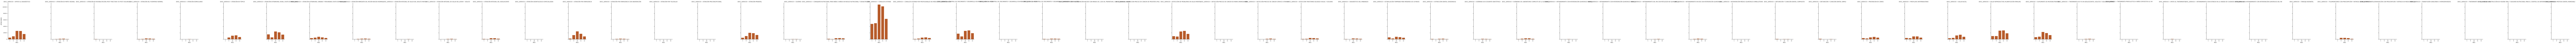

In [108]:
#Gráfica de atenciones por cada mes agrupadas por tipo de servicio
sns.catplot("MES", "ATENCIONES", col="DESC_SERVICIO", data=df_DSM, kind="bar", color="#CE5413")

#### Analizando la Cantidad de Atenciones por Sexo agrupados por Region

In [112]:
#Suma de atenciones por tipo de sexo agrupado por cada Region
df_SR = pd.DataFrame(df.groupby(["SEXO","REGION"], as_index=False)["ATENCIONES"].sum())
df_SR.reset_index()
df_SR

,SEXO,REGION,ATENCIONES
0,FEMENINO,AMAZONAS,112518.0
1,FEMENINO,APURÍMAC,22759.0
2,FEMENINO,AREQUIPA,19482.0
3,FEMENINO,AYACUCHO,32839.0
4,FEMENINO,CAJAMARCA,60276.0
5,FEMENINO,CALLAO,11242.0
6,FEMENINO,CUSCO,48760.0
7,FEMENINO,HUANCAVELICA,28282.0
8,FEMENINO,HUÁNUCO,34042.0
9,FEMENINO,ICA,7695.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


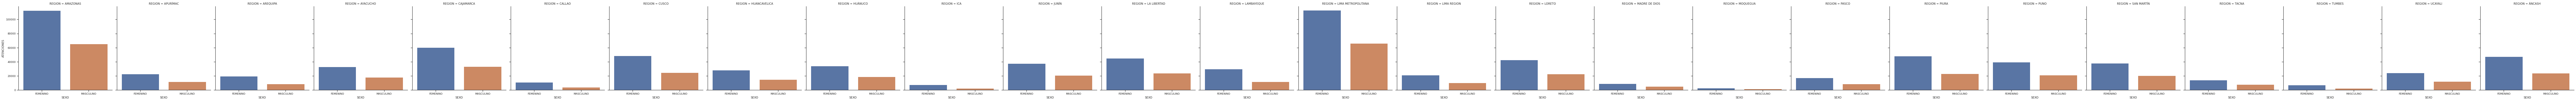

In [113]:
#Gráfica de atenciones por tipo de sexo agrupado por cada Region
sns.catplot("SEXO", "ATENCIONES", col="REGION", data=df_SR, kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


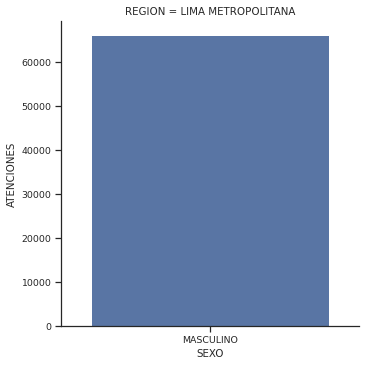

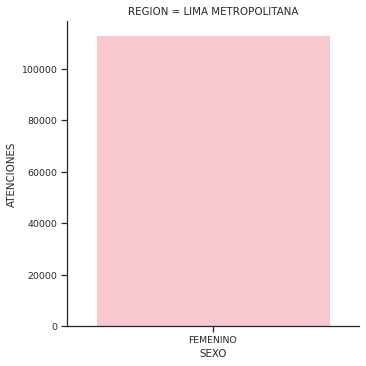

In [115]:
import seaborn as sns
import pandas as pd
#Creando un nuevo dataframe para almacenar la data
go = df.groupby(["SEXO","REGION"])["ATENCIONES"].sum()
go1 = pd.DataFrame(go).reset_index()

### PARTE 2
g = go1.groupby(["SEXO"])
#a = go1.get_group("MASCULINO")
m = g.get_group("MASCULINO").sort_values("ATENCIONES",ascending=False)
f = g.get_group("FEMENINO").sort_values("ATENCIONES",ascending=False)

#Graficando las ATENCIONES POR REGIÓN EN BASE AL SEXO
sns.catplot("SEXO", "ATENCIONES", col="REGION", data=m.head(1), kind="bar")
sns.catplot("SEXO", "ATENCIONES", col="REGION", data=f.head(1), kind="bar", color="pink")